In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Importation du jeu de données MNIST

In [9]:
data, meta = arff.loadarff(r"C:\Users\nicolas.sales\Desktop\Projet csv\MNIST\mnist_784.arff")

In [11]:
X = np.array(data.tolist())

y = X[:, -1]

X = X[:, :-1]

In [13]:
X = X.astype(float)
y = y.astype(int)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# PCA sans réduction de dimension. Préserve 95% de la variance du jeu d'entraînement puis calcule le nombre de composantes requises (d)

In [18]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) +1

In [20]:
d

154

In [22]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [23]:
pca.n_components_

154

In [24]:
X_train.shape

(60000, 784)

In [28]:
X_reduced.shape

(60000, 154)

### 154 variables sur 784 ont été gardées après réduction

In [31]:
cumsum.shape

(784,)

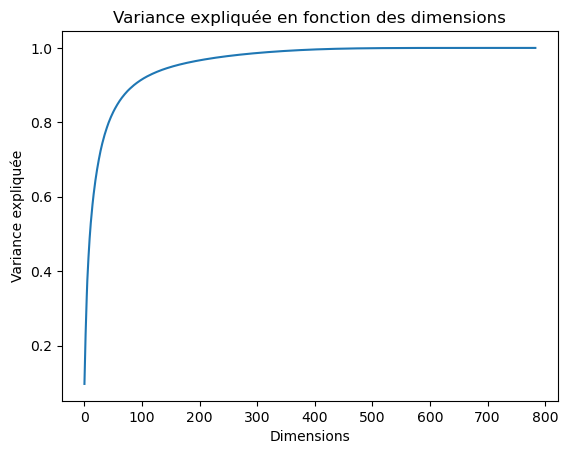

In [33]:
plt.plot(cumsum)
plt.xlabel("Dimensions")
plt.ylabel("Variance expliquée")
plt.title("Variance expliquée en fonction des dimensions")
plt.show()

### En réduisant à 100 dimensions, on perd peut de la variance expliquée

# Pipeline avec PCA et classification

In [39]:
clf = make_pipeline(PCA(random_state=42),
                    RandomForestClassifier(random_state=42))

param_distrib = {
    "pca__n_components" : np.arange(10,80),
    "randomforestclassifier__n_estimators" : np.arange(50,500)
}

rnd_search = RandomizedSearchCV(clf, param_distrib, n_iter=10, cv=3, random_state=42)

rnd_search.fit(X_train[:1000], y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [41]:
print(rnd_search.best_params_)

{'randomforestclassifier__n_estimators': 465, 'pca__n_components': 23}


### Le nombre de composantes principales est bas car le RandomForestClassifer est un modèle puissant

# Décompresser le X réduit à X initial

In [45]:
X_reduced.shape

(60000, 154)

In [47]:
X_recovered = pca.inverse_transform(X_reduced)

In [48]:
X_recovered.shape

(60000, 784)

# Image originale vs Image après compression et décompression

In [52]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

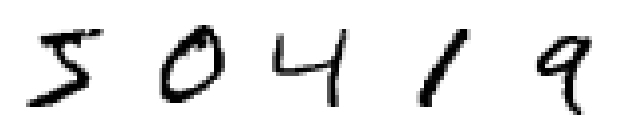

In [65]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_digit(X_train[i])

plt.tight_layout()  
plt.show()

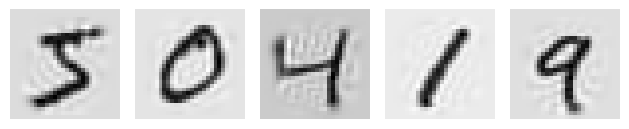

In [63]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_digit(X_recovered[i])

plt.tight_layout()  
plt.show()

### Les nouvelles données (X_recovered) ont perdu des informations dû aux 5% de variance abandonnées. Les images sont un peu dégradées mais les chiffres restent intactes.

# Erreur de reconstruction

In [74]:
reconstruction_error = mean_squared_error(X_train, X_recovered)

print("reconstruction error :", reconstruction_error)

reconstruction error : 217.79366111265574


### L'erreur de reconstruction reflète la différence entre les données initiales et celles reconstruites, donc avec 95% de la variance gardée.